<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/Stats_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project by Nishant Killedar**
Applied Statistics project which has 3 parts <br>
Part 1 : Probability related questions using a joint probability table <br>
Part 2 : Analysis and insights for a basketball division of American League <br>
Part 3 : Analysis and insights for startup companies and their funding

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
from numpy import random
from scipy.stats import binom
from scipy.stats import poisson
import math as math
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

> #### **Part 1 : Question 1**

*Please refer the table below to answer below questions: [2 Marks]*

Planned to Purchase Product A | Actually placed order for Product A - Yes | Actually placed order for Product A - No | Total
---   | --- | ---  | ---
Yes   | 400 |  100 |  500
No    | 200 | 1300 | 1500
Total | 600 | 1400 | 2000


<hr>
<ul>
<li>
1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order.[1 Mark]

In [ ]:
nPA = 400        # nPA : number of people who planned to order & actually placed an order
nT = 2000        # nT : total number of people
pA = nPA / nT    # joint probability
pA

0.2

<hr>
<ul><li>
 1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase. [1 Mark]  <br>

```
Set A : People who actually placed an order
Set B : People who planned to purchase
Conditional probability of (A) given (B)
     P(A|B) = P(A and B) / P(B)
```



In [ ]:
pAnB = 400/2000    # pAnB : probability of A and B ( From the table )
pB   = 500/2000    # pB : probability of B ( From the table)
pAgB = pAnB/pB     # pAgB : probability of A given B
pAgB

0.8

> #### **Part 1 : Question 2**

*An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions.[4 Marks]*

---

<i>
We can use the binomial probability distribution to determine the probability of k failures/successes in n samples. In the given example, we have a sample size of n=10 & a failure probability p=0.05 (5%). This can be passed to the binom pmf / cdf functions in the stats package to answer all questions</i>

In [ ]:
p = 0.05
n = 10
pbar = 1-p

<hr>
<ul><li>
<font color='brown'>2.A. Probability that none of the items are defective? [1 Mark]</font>

In [ ]:
k=0
p1 = binom.pmf(k, n, p)
print ('Probability that none of the items are defective is',str(np.around(p1,4)))

Probability that none of the items are defective is 0.5987


In [ ]:
k=19
n=30
p=0.5
p1 = binom.cdf(k, n, p)
1-p1

0.04936857335269451

In [ ]:
mu = 75000
sigma = 12000
q = (sigma*sigma/mu)
q

1920.0

<hr>
<ul><li>
<font color='brown'>2.B. Probability that exactly one of the items is defective? [1 Mark]</font>

In [ ]:
k=1
p2 = binom.pmf(k, n, p)
print ('Probability that exactly one of the items is defective is',str(np.around(p2,4)))

Probability that exactly one of the items is defective is 0.0


<hr>
<ul><li>
<font color='brown'>2.C. Probability that two or fewer of the items are defective? [1 Mark]</font>

In [ ]:
k=2
p3 = binom.cdf(k, n, p)
print ('Probability that two or fewer of the items are defective is',str(np.around(p3,4)))

Probability that two or fewer of the items are defective is 0.0


<hr>
<ul><li>
<font color='brown'>2.D. Probability that three or more of the items are defective? [1 Mark]</font>

In [ ]:
k=3
p4 = 1 - binom.cdf(k, n, p)
print ('Probability that three or more of the items are defective is',str(np.around(p4,4)))

Probability that three or more of the items are defective is 1.0


> #### **Part 1 : Question 3**

*A car salesman sells on an average 3 cars per week [3 Marks]*

<hr>
<ul><li>
3.A. What is Probability that in a given week he will sell some cars? [1 Mark]

In [ ]:
l = 3
k = 0
p = 1 - poisson.pmf(k, l)
print ('Probability that the car salesman will sell some cars this week is',str(np.around(p,4)))

Probability that the car salesman will sell some cars this week is 0.9502


In [ ]:
l = 5
k = 3
p = poisson.pmf(k,l)
p

0.1403738958142805

<hr>
<ul><li>
3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars? [1 Mark]

In [ ]:
l = 3
k1 = 2
k2 = 4
p1 = poisson.cdf(k1, l) # probability of selling more than 2 cars
p2 = poisson.cdf(k2, l) # probability of selling more than 4 cars
p = p2-p1 # probability of selling more than 2 but less than 5 cars
print ('Probability that the car salesman will sell more than 2 and less than 5 cars in a given week is',str(np.around(p,4)))

Probability that the car salesman will sell more than 2 and less than 5 cars in a given week is 0.3921


<hr>
<ul><li>
3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week. [1 Mark]

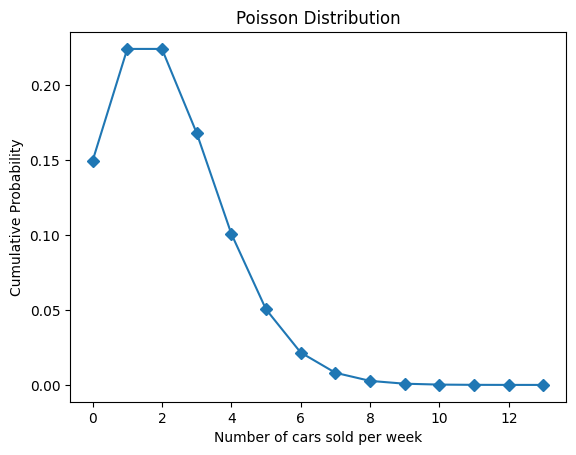

In [ ]:
l = 3
k = np.arange(1,15,1)
p = poisson.pmf(k,l)
plt.plot(p,'D-')
plt.title('Poisson Distribution')
plt.xlabel('Number of cars sold per week')
plt.ylabel('Cumulative Probability');

> #### **Part 1 : Question 4**


*Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours independently place orders with the same bot. Answer the following questions.*[3 Marks]

In [ ]:
# Function to calculate combination (nCk)
def nCk(n, k):
  return math.comb(n,k)

In [ ]:
def Pk(p, n, k):
  return nCk(n,k) * (p**k) * ((1-p)**(n-k))

In [ ]:
p = 0.868
n = 3
k = 3

prob = Pk(p, n, k)
print('Probability of recognizing 3 orders correctly is',str(np.around(prob,4)))

Probability of recognizing 3 orders correctly is 0.654


<hr>
<ul><li>
4.B. What is the probability that none of the three orders will be recognised correctly? [1 Mark]

In [ ]:
p = 0.868
n = 3
k = 0

prob = Pk(p, n, k)
print('Probability of not recognizing any order correctly is',str(np.around(prob,4)))

Probability of not recognizing any order correctly is 0.0023


<hr>
<ul><li>
4.C. What is the probability that at least two of the three orders will be recognised correctly? [1 Mark]

In [ ]:
p = 0.868
n = 3

# probability that 2 orders will be recognized correctly
k = 2
prob1 = Pk(p, n, k)

# probability that 3 orders will be recognized correctly
k = 3
prob2 = Pk(p, n, k)

# probability that atleast 2 orders will be recognized correctly
prob = prob1 + prob2
print('Probability of recognizing atleast 2 orders correctly is',str(np.around(prob,4)))

Probability of recognizing atleast 2 orders correctly is 0.9523


> #### **Part 1 : Question 5**
> #### <font color='green'>

*Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of Applied Statistics to get data driven business solution. [3 Marks]*

<b><font color='brown'>
Probability concepts can be used in weather forecasting to determine chance of rain or sun. Trends for average rainfall are calculated and maintained. This can be used to predict the probability of rain in the coming week or months.
<br><br>Probability is also used in betting where odds in favor / odds against are used to determine how much money to wager on a particular game or race </font></b>

> ### **Part 2 : Question 1**

*Read the data set, clean the data and prepare final dataset to be used for analysis. [10 Marks]*

In [ ]:
bb = pd.read_csv('/content/drive/MyDrive/datasets/DS+-+Part2+-+Basketball.csv')

In [ ]:
bb.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [ ]:
bb = bb.replace('-', np.NaN)

In [ ]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TournamentChampion   9 non-null      object
 10  Runner-up            13 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [ ]:
bbcln = bb.drop(columns=['TournamentChampion', 'Runner-up'])

In [ ]:
i = bbcln[bbcln['Score'].isna()].index

In [ ]:
# Team 61 has played only 1 tournament and there is no data for this team
# Best to delete this row from the analysis & include when more details are available
bbcln.drop(i, inplace=True)

In [ ]:
bbcln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TeamLaunch           60 non-null     object
 10  HighestPositionHeld  60 non-null     int64 
dtypes: int64(2), object(9)
memory usage: 5.3+ KB


In [ ]:
bbcln = bbcln.astype('int', errors='ignore')

In [ ]:
bbcln['TeamLaunch'].unique()

array(['1929', '1931to32', '1934-35', '1939-40', '1932-33', '1941to42',
       '1948-49', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1961-62', '1940-41', '1930-31', '1963-64', '1974-75', '1943-44',
       '1987-88', '1991_92', '2007-08', '1962-63', '1994-95', '1978-79',
       '1971-72', '1999to00', '2014-15', '1990-91', '1947-48', '1996-97',
       '1995-96', '1945-46', '1953-54', '1979-80', '1950-51', '2016_17',
       '2009-10', '1956-57', '1951~52', '1955-56'], dtype=object)

In [ ]:
# Consider only the first year provide in Team Launch Range as the Launch Year
bbcln['TeamLaunch'] = bbcln['TeamLaunch'].str[:4]

In [ ]:
bbcln = bbcln.astype('int', errors='ignore')

In [ ]:
bbcln['Score'] = bbcln['Score'].astype('int')
bbcln['PlayedGames'] = bbcln['PlayedGames'].astype('int')
bbcln['WonGames'] = bbcln['WonGames'].astype('int')
bbcln['DrawnGames'] = bbcln['DrawnGames'].astype('int')
bbcln['LostGames'] = bbcln['LostGames'].astype('int')
bbcln['BasketScored'] = bbcln['BasketScored'].astype('int')
bbcln['BasketGiven'] = bbcln['BasketGiven'].astype('int')

In [ ]:
bbcln.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1957.950000,7.050000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,26.646732,5.315232
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,1929.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,1934.750000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,1950.500000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,1977.250000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,2016.000000,20.000000


> ### **Part 2 : Question 2**

*Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them. Also as a data and statistics expert you have to develop a detailed performance report using this data. [10 Marks]*

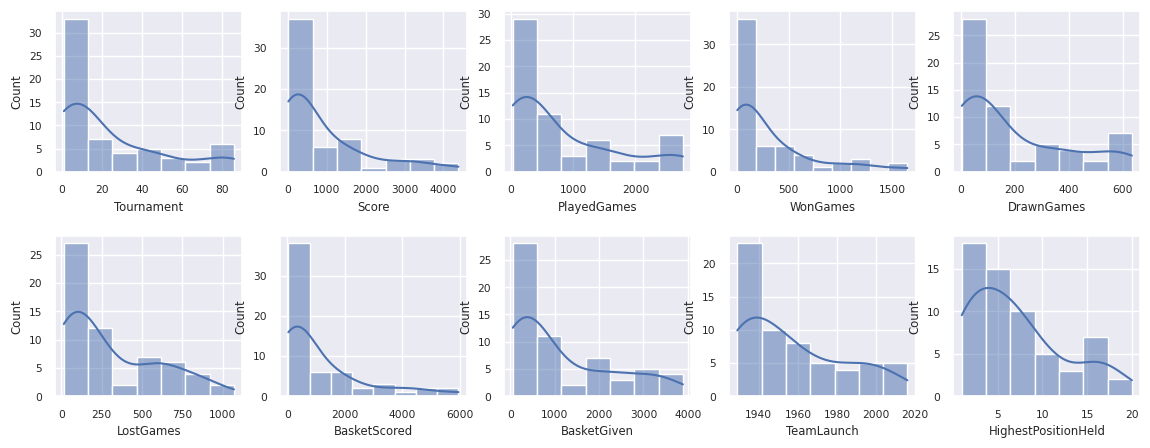

In [ ]:
# Univariate analysis of all columns
numcols = bbcln.select_dtypes(include=np.number).columns.tolist()
sns.set(font_scale=0.7)
fig, ax = plt.subplots(2,5,figsize=(14,5))
plt.subplots_adjust(hspace=0.4)
for i, col in enumerate(numcols[0:10]):
  plot = sns.histplot(bbcln[col], kde=True, ax=ax[i//5,i%5])
plt.show()

<hr color='red'>

<b>Insight 1 :</b> More than half the teams (33-34) have played < 20 tournaments, however only 5-6 teams were launched after 2000. This shows that there are approx 20 teams that have been around for more than 20 years and have played less than 20 tournaments.</span>

A short list of good teams can be identified by filtering for teams that have played more than 20 tournaments, or those that have < 20 tournaments but were in the top 10 positions and were launched after 1990 - this gives us 26 teams.


<hr color='red'>

In [ ]:
# Identify all the good teams
bbgoodteams = bbcln[((bbcln['Tournament']<20)&(bbcln['TeamLaunch']>1990)&(bbcln['HighestPositionHeld']<10))|(bbcln['Tournament']>20)]

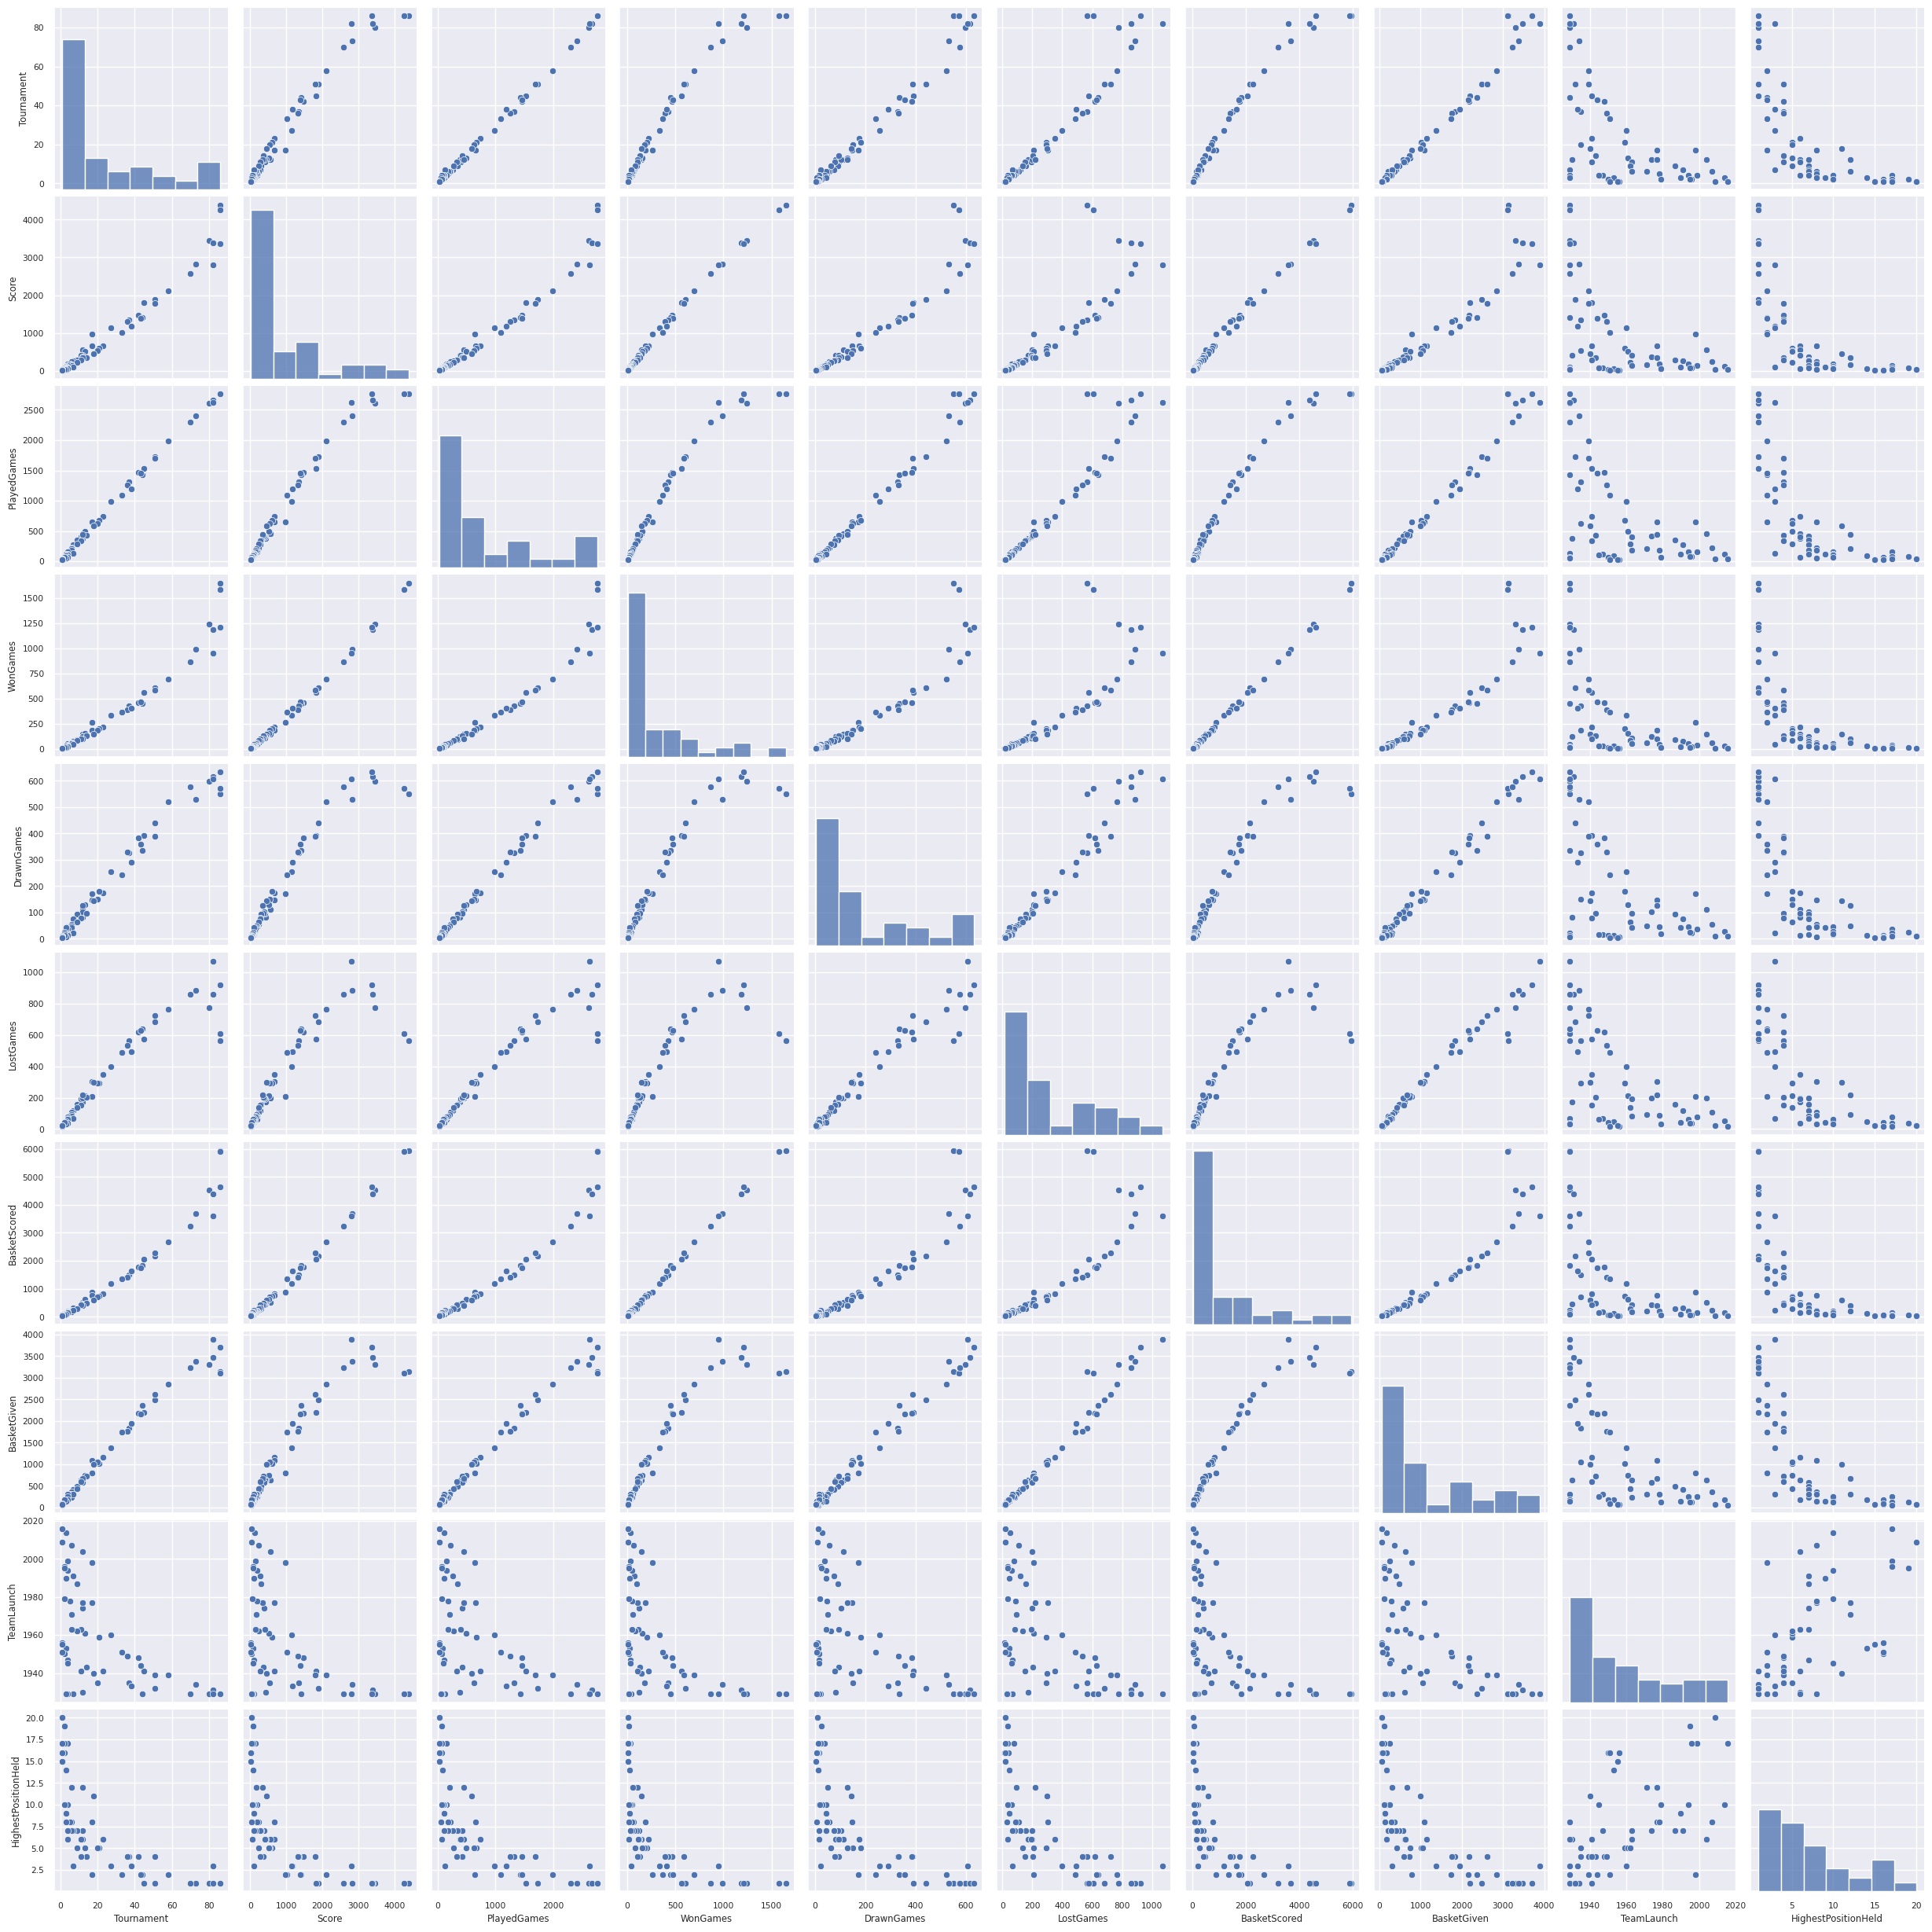

In [ ]:
# Bivariate analysis
sns.pairplot(bbcln)

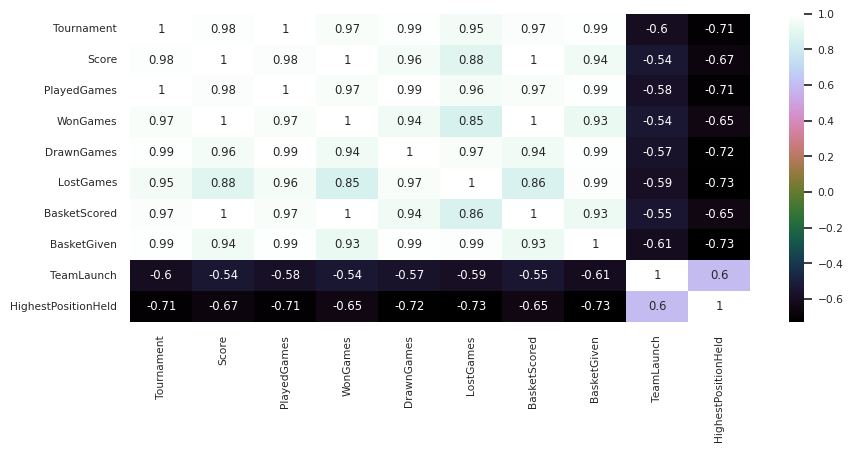

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(bbcln.corr(), annot=True, cmap='cubehelix');

<hr color='red'>

The above heatmap shows that many of the features provided are highly correlated and do not provide additional information. For e.g., BasketGiven has a high correlation with all features which means the information this feature provides can be derived from other columns. Combining some of the features can help provide better analysis and metrics for each team. For e.g.,
```
Win Percent = No. of Games Won / No. of Games Played
Score Rate = No. of Basket Scored / No. of Games Played
Defend Rate = No. of Basket Given / No. of Games Played
```
These features allow us to predict winnability of teams. The best teams to invest will be those with a higher Win %, a high score rate and a low defend rate

<hr color='red'>

In [ ]:
# Creating features that will help determine winnability
bbcln['WinPct'] = (bbcln['WonGames']/bbcln['PlayedGames'])*100 # Win Percentage
bbcln['ScoreRate'] = (bbcln['BasketScored']/bbcln['PlayedGames']) # Scoring Rate
bbcln['DefendRate'] = (bbcln['BasketGiven']/bbcln['PlayedGames'])

<hr color='red'>

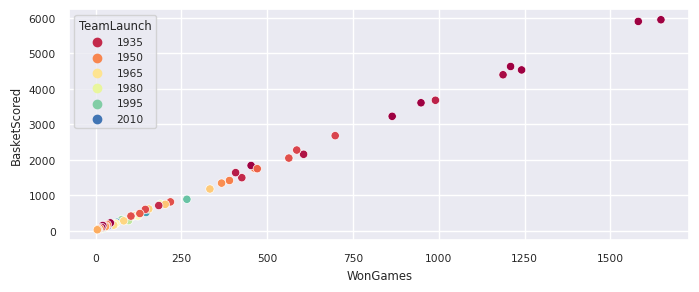

In [ ]:
# Multivariate analysis
plt.figure(figsize=(8,3))
sns.scatterplot(data=bbcln, x=bbcln['WonGames'], y=bbcln['BasketScored'], hue=bbcln['TeamLaunch'], palette='Spectral');

In [ ]:
plt.figure(figsize=(8,3))
px.scatter(data_frame=bbcln, x=bbcln['WonGames'], y=bbcln['BasketScored'], color=bbcln['TeamLaunch'])

<Figure size 800x300 with 0 Axes>

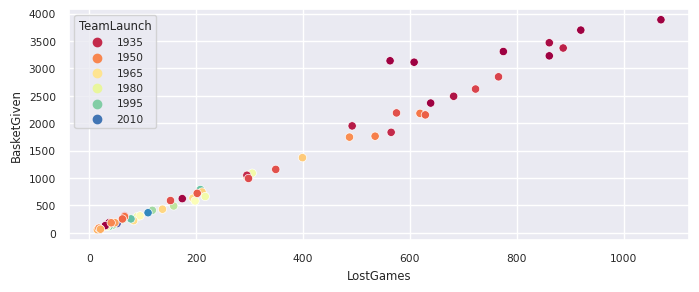

In [ ]:
plt.figure(figsize=(8,3))
sns.scatterplot(data=bbcln, x=bbcln['LostGames'], y=bbcln['BasketGiven'], hue=bbcln['TeamLaunch'], palette='Spectral');

<ul><li>
The above 2 charts show that there is a positive correlation between Games won and Baskets scored. Also, newer teams don't show a higher number of games. Using this data for analysis will skew the results towards older teams as they have more volume. <br><br>
<li>
A better picture can be represented if data is provided by year or by game or by tournament so, we can get a slice of performance of the teams in last ten years ( with all teams having 10 years worth of data )

We can also look at the following key indicators for better analysis, although not having data by team for each game is limiting the analysis of performance of the team. For e.g., some teams may have done well in 1930s but as the data is cumulative, it does not tell you more about how these older teams are doing in recent years. Newer teams data has smaller numbers and this skews the analysis for newer teams impacting investment decisions

<ul><li>Best Performing Team
<li> Oldest Team
<li> Team with highest goals
<li> Team with lowest performance
<li> Create your own features
<li> Find hidden patterns
<li> Publish interactive plots



<hr color='red'>

In [ ]:
# Oldest Team
bbcln[(bbcln['TeamLaunch'] == bbcln['TeamLaunch'].min()) & (bbcln['PlayedGames'] == bbcln['PlayedGames'].max())]['Team']

0    Team 1
1    Team 2
4    Team 5
Name: Team, dtype: object

The best performing teams are those that meet the below 3 criteria ( this is just one of the ways using the data available & will not produce ideal results without having game level data ). These are teams that are prime candidates for investment as they have high winnability

```
Win Percentage > 40% ( % of games won of all played games ) And
Score Rate > 1.5 ( number of baskets scored / played game ) And
Defend Rate < 1.5 ( number of baskets given / played game )
```



In [ ]:
# Best performing teams
bbcln[(bbcln['WinPct'] >= 40) & (bbcln['ScoreRate'] >= 1.5) & (bbcln['DefendRate'] <= 1.5)]['Team']

0    Team 1
1    Team 2
2    Team 3
3    Team 4
4    Team 5
5    Team 6
Name: Team, dtype: object

<b>Insight 2</b> : The top 3 teams from the list above ( Team 1, 2, 3 ) are good candidates to invest as they have demonstrated higher Win %s and a better ability to score and defend as compared to other teams. Teams 4, 5, 6 also have good potential. One thing to note however is they are older teams and have higher amount of data. To determine newer teams that are investment worthy, a more detailed analysis of recent years across teams is necessary

In [ ]:
# Teams with highest baskets scored
bbcln[(bbcln['BasketScored']==bbcln['BasketScored'].max())]['Team']

0    Team 1
Name: Team, dtype: object

In [ ]:
# Teams with lowest performance
# Lowest performance will be a combination of lost games, lower baskets score, highest position help as a % of played games
bbcln[(bbcln['HighestPositionHeld']==bbcln['HighestPositionHeld'].max())]['Team']

56    Team 57
Name: Team, dtype: object

> ### **Part 2 : Question 3**

For better analysis, the following corrections can be made
<hr>
<ul>
<li> Volume : Data for teams from their launch has been included, however there is no granularity in terms of how teams launched in 1929 are doing year over year. More data for each team by year and additional information on game details ( for e.g., 3 pointers, passes and other information ) can help with better analysis
<br><br>
<li> Variety : A lot of data on games is available today due to better capture tools, so more detailed information on each game ( free throws, passes, 3 pointers, attempts, blocks and social media posts ) can be captured, summarized and used for an indepth analysis. Posts will also give qualitative information on support from fans which can influence investments
<br><br>
<li> Velocity : While this is a post-facto analysis, real time data can influence how a team will perform. For e.g., providing information from training games on a daily, weekly basis which can be summarized into a score indicating how the team is doing today - this can be derived using player info on health, work-out, food coming from their smart watches or devices which can then be cumulated for the team to determine team state
<br><br>
<li> Veracity : In this dataset, the average number of baskets scored per game is 1.25, this is not correct information for basketball games as typical baskets per game is 60-70 & the corresponding score is also around 80-90 per game which means the Score column also does not provide the right information. It seems like the data is more relevant for football games as opposed to basketball. Simple checks using descriptive stats can be done to validate the truthfulness of the data
<br><br>
<li> Quality : Overall, quality of the data in terms of completeness of information can be improved. For e.g., tournament champion or runner-up did not have data for teams who had highestpositionheld as 1 or 2. Also, these columns are per tournament basis and so having a row by row data for each tournament, game and team will be more beneficial for the analysis as opposed to summarized data for each team. By summarizing, we lose a lot of critical information which leads to poor analysis
<hr>

> ### **Part 3 : Question 1**

*Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, present in person and online.*

> PROJECT OBJECTIVE: Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from
the dataset.

In [ ]:
#1. Read the CSV file
com = pd.read_csv('/content/drive/MyDrive/datasets/DS+-+Part3+-+CompanyX_EU.csv')
com.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


> ### **Part 3 : Question 2**

> ***Data Exploration: [1 Mark]***
> <div style="font-size: 8px">
A. Check the datatypes of each attribute.<br>
B. Check for null values in the attributes.
</div>

In [ ]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


> <div style="font-size: 8px">
As can be seen from the info() table above, the data types for all attributes is object and Product / Funding columns have null values. Product is null in 6 rows and Funding is null for 214 rows </div>

> ### **Part 3 : Question 3**

> ***Data preprocessing & visualisation: [4 Marks]***<br>
> A. Drop the null values. [1 Mark]<br>
B. Convert the ‘Funding’ features to a numerical value.
(Execute below code)
>```
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 \
if x[-1] == 'K' \
else (float(x[1:-1])*1000 if x[-1] == 'B' \
else float(x[1:-1])))
```
C. Plot box plot for funds in million. [1 Mark]<br>
D. Check the number of outliers greater than the upper fence. [1 Mark]<br>
E. Check frequency of the OperatingState features classes. [1 Mark]

In [ ]:
# Drop the null values. [1 Mark] >> This will result in deletion of 214 rows
comcln = com.dropna(axis=0, how='any')
print('The data set has '+str(comcln.isna().sum().sum())+' null values')

The data set has 0 null values


In [ ]:
# Convert funding features to a numerical value (execute the provided code)
comcln.loc[:,'Funds_in_million'] = comcln['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

In [ ]:
comcln.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


<Axes: xlabel='Funds_in_million'>

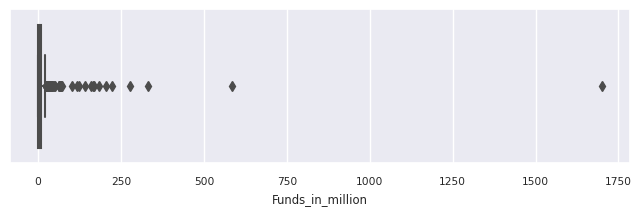

In [ ]:
# Plot box plot for funds in million. [1 Mark]
plt.figure(figsize=(8,2))
sns.boxplot(data=comcln, x=comcln['Funds_in_million'])
# As the data has many outliers, it is difficult to see the box plot clearly

<Axes: xlabel='Funds_in_million'>

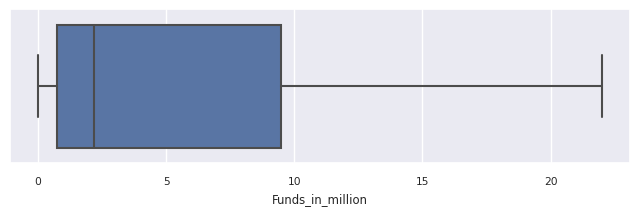

In [ ]:
# Hiding the outliers helps us see the distribution of data better
# Median of funding is around 2.5 million $

plt.figure(figsize=(8,2))
sns.boxplot(data=comcln, x=comcln['Funds_in_million'], showfliers=False)

In [ ]:
# Check the number of outliers greater than upper fence. [1 Mark]
Q1 = comcln['Funds_in_million'].quantile(0.25)
Q3 = comcln['Funds_in_million'].quantile(0.75)
IQR = Q3-Q1
upper = Q1 + 1.5*IQR
print('Q1 : '+str(Q1) +'M, '+ 'Q3 : '+ str(Q3)+'M, '+ 'IQR : '+str(IQR)+'M, '+'Upper : '+str(upper)+'M')
outliers =  comcln[comcln['Funds_in_million']>upper]
print('There are '+ str(outliers.shape[0]) +' outliers greater than the upper fence')

Q1 : 0.74525M, Q3 : 9.475M, IQR : 8.72975M, Upper : 13.839875M
There are 83 outliers greater than the upper fence


In [ ]:
# Check frequency of the OperatingState features classes. [1 Mark]
comcln['OperatingState'].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

><div
A. Drop the null values. [1 Mark]
B. Convert the ‘Funding’ features to a numerical value.
(Execute below code)
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
C. Plot box plot for funds in million. [1 Mark]
D. Check the number of outliers greater than the upper fence. [1 Mark]
E. Check frequency of the OperatingState features classes. [1 Mark]

> ### **Part 3 : Question 4**

> **Statistical Analysis: [10 Marks]**<br>
A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? [1 Mark]<br>
B. Write the null hypothesis and alternative hypothesis. [1 Mark]<br>
C. Test for significance and conclusion [1 Mark]<br>
D. Make a copy of the original data frame. [1 Mark]<br>
E. Check frequency distribution of Result variables. [1 Mark]<br>
F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating [1 Mark]<br>
G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: [2 Mark]<br>
H. Test for significance and conclusion [1 Mark]<br>
I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards. [1 Mark]

In [ ]:
# Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? [1 Mark]
Avg_Funding_for_Operating_Cos = comcln[comcln['OperatingState']!='Closed']['Funds_in_million'].mean()
Avg_Funding_for_Closed_Cos = comcln[comcln['OperatingState']=='Closed']['Funds_in_million'].mean()
print('Yes, there is significant difference in funding raised for operating companies vs closed companies')
print('Average funding received by an operating company including acquired and IPOs is : ' +str(round(Avg_Funding_for_Operating_Cos,2))+' M$')
print('Average funding received by a closed company is : ' +str(round(Avg_Funding_for_Closed_Cos,2))+' M$')

Yes, there is significant difference in funding raised for operating companies vs closed companies
Average funding received by an operating company including acquired and IPOs is : 19.29 M$
Average funding received by a closed company is : 3.26 M$


> Write the null hypothesis and alternative hypothesis. [1 Mark]
> <ul>
> <li>H0 : Operating companies raise same funding as Closed companies (FO = FC)
> <li>HA : Operating companies raise significantly different funding than Closed companies ( FO <> FC )


In [ ]:
# Test for significance and conclusion [1 Mark]
# The samples are independent - Operating companies do not influence funding of closed companies
# We have more than 30 samples, and we are comparing 2 different populations
# We will need to do a 2 sample T-Test
fo = comcln[comcln['OperatingState']!='Closed']['Funds_in_million'] # Funding for Operating Companies
fc = comcln[comcln['OperatingState']=='Closed']['Funds_in_million'] # Funding for Closed Companies

In [ ]:
# Before we perform the test, we need to check if the two populations have equal variances or not.
# As a rule of thumb, we can assume the populations have equal variances if the
# ratio of the larger sample variance to the smaller sample variance is less than 4:1.
import scipy.stats as stats
print(np.var(fo), np.var(fc))
print(np.var(fo)/np.var(fc))

9328.035966056008 34.469877948057864
270.61412808343226


In [ ]:
# As the ratio of variances is > 4, they do not have equal variances
# This means we will have to do a Welch's t-test (equal_var parameter is set to False)
stat, pvalue = stats.ttest_ind(fo, fc, equal_var = False)
if pvalue < 0.05 :
  print('Reject the null hypothesis')
  print('Companies that are closed do not raise the same funding as operating companies')
else :
  print('Fail to Reject the null hypothesis')
  print('Companies that are closed raise the same funding as operating companies')

Reject the null hypothesis
Companies that are closed do not raise the same funding as operating companies


In [ ]:
# Make a copy of the original data frame. [1 Mark]
comcp = comcln.copy()

In [ ]:
# Check frequency distribution of Result variables. [1 Mark]
comcp['Result'].value_counts()

Contestant         312
Finalist            65
Audience choice     25
Winner              25
Runner up           19
Name: Result, dtype: int64

In [ ]:
# Calculate percentage of winners that are still operating and percentage of contestants that are still operating [1 Mark]
nw = comcp[comcp['Result']=='Winner'].shape[0]
nwo = comcp[(comcp['Result']=='Winner') & (comcp['OperatingState']!='Closed')].shape[0]
nc = comcp[comcp['Result']!='Winner'].shape[0]
nco = comcp[(comcp['Result']!='Winner') & (comcp['OperatingState']!='Closed')].shape[0]
print('% of winners that are still operating is :'+str(round((nwo/nw)*100,2))+' %')
print('% of contestants that are still operating is :'+str(round((nco/nc)*100,2))+' %')

% of winners that are still operating is :100.0 %
% of contestants that are still operating is :86.46 %


> Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: [2 Mark]
> <ul><li>
H0 : Proportion of companies that are still operating from both groups (winners and contestants) is same ( OW = OC )
> <li>HA : Proportion of companies that are still operating from both groups (winners and contestants) is not same ( OW <> OC )

In [ ]:
# Test for significance and conclusion [1 Mark]
# For comparing proportions of 2 populations, we will use the 2 proportion z-test
from statsmodels.stats.proportion import proportions_ztest
stat, pvalue = proportions_ztest (count=[nwo, nco], nobs=[nw, nc], alternative='larger')
if pvalue < 0.05 :
  print('Reject the null hypothesis')
  print('Proportion of companies operating from both groups (winners and contestants) is not the same')
if pvalue > 0.05 :
  print('Fail to Reject the null hypothesis')
  print('Proportion of companies operating from both groups (winners and contestants) is the same')

Reject the null hypothesis
Proportion of companies operating from both groups (winners and contestants) is not the same


In [ ]:
# Select only the Event that has ‘disrupt’ keyword from 2013 onwards. [1 Mark]
disrupt = comcp[comcp['Event'].str.contains('Disrupt')]
disrupt['Year'] = [x.strip()[-4:] for x in disrupt['Event']]
disrupt['Year'] = disrupt['Year'].apply(pd.to_numeric)
disrupt[disrupt['Year']>=2013]

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million,Year
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.630,2013
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.000,2016
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating,1.000,2015
14,Aiden,aiden.ai,$750K,Disrupt London 2016,Contestant,Operating,0.750,2016
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating,11.600,2015
...,...,...,...,...,...,...,...,...
641,Workspot,workspot.com,$15.8M,Disrupt NYC 2013,Contestant,Operating,15.800,2013
642,Xendo,xendo.com,$28K,Disrupt SF 2014,Contestant,Acquired,0.028,2014
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,0.900,2015
656,Zenefits,zenefits.com,$583.6M,Disrupt NYC 2013,Finalist,Operating,583.600,2013


In [ ]:
%%shell
jupyter nbconvert --to html /content/Stats-Project.ipynb

[NbConvertApp] Converting notebook /content/Stats-Project.ipynb to html
[NbConvertApp] Writing 1596086 bytes to /content/Stats-Project.html
